# Homework 3
### Due Date:  Tuesday, September 20th at 11:59 PM

---
## Problem 1:  `Git` and recovering from a mistake
You will do this problem in the Jupyter notebook so I can see your output.  Once again, you will work with your playground repository.

**NOTE:** At the beginning of each cell, you MUST type `%%bash`.  If you don't do that then you will not be able to work with the necessary bash commands.

Follow the following steps for this problem:

1. First cell:
  1. Type `cd /tmp` to enter the temporary directory
  2. git clone url_to_your_playground_repo
2. Second cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git pull origin mybranch1`
  3. `ls`
3. Third cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git status`
4. Fourth cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git reset --hard origin/master`
  3. `ls`
5. Fifth cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git status`

The whole point of this problem was to show you how to get your local repo back to an earlier state.  In this exercise, you accidentally merged something to `master` that you didn't want.  Rather than starting to delete things all over the place, you can simply reset your `HEAD` to a previous commit.

In [1]:
%%bash
cd /tmp
rm -rf playground
git clone https://github.com/xuwd11/playground

Cloning into 'playground'...


In [2]:
%%bash
cd /tmp/playground
git pull origin mybranch1
ls

Already up-to-date.
books.md
feature.txt
intro.md
world.md


From https://github.com/xuwd11/playground
 * branch            mybranch1  -> FETCH_HEAD


In [3]:
%%bash
cd /tmp/playground
git status

On branch master
Your branch is up-to-date with 'origin/master'.

nothing to commit, working tree clean


In [4]:
%%bash
cd /tmp/playground
git reset --hard origin/master
ls

HEAD is now at 9621d1b Merge branch 'master' of https://github.com/xuwd11/playground
books.md
feature.txt
intro.md
world.md


In [5]:
%%bash
cd /tmp/playground
git status

On branch master
Your branch is up-to-date with 'origin/master'.

nothing to commit, working tree clean


## Problem 2:  `Git` and checking out a single file
Sometimes you don't want to merge an entire branch from the upstream but just one file from it. There is a direct use case for such a situation. Suppose I've made an error in this homework (or a lecture) and want to correct it. I fix the mistake in the upstream repo. In the meantime you have edited some other files and you really don't want to manually ignore my older copies of those files. Rather, you want to fix just one file from this new branch. This is how you do it.

As usual, be sure to type in `%%bash` before you write any `bash` commands in a cell.

**Note:** The steps below assume that you have already cloned the `playground` repo in this notebook.

1. First cell:
  1. Go into the `playground` repo and fetch the changes from the master branch of the `course` remote.
2. Second cell:
  1. `git checkout course/master -- README.md`.  The `--` means that `README.md` is a file (as opposed to a `branch`).
  2. `cat README.md`.  This just looks at the updated file.
3. Third cell:
  1. `git status`
  2. Commit the changes to your local repo with an appropriate commit message.
  3. `git status`
  4. Push the changes to your remote repo.

In [9]:
%%bash
cd /tmp/playground
git remote add course https://github.com/dsondak/playground.git
git fetch course master

From https://github.com/dsondak/playground
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> course/master


In [10]:
%%bash
cd /tmp/playground
git checkout course/master -- README.md
cat README.md

# Playground Repo

For practicing.


In [11]:
%%bash
cd /tmp/playground
git status
git commit -m "Updated README.md"
git status
git push

On branch master
Your branch is up-to-date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   README.md

[master 468e3dc] Updated README.md
 1 file changed, 3 insertions(+)
 create mode 100644 README.md
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


To https://github.com/xuwd11/playground
   9621d1b..468e3dc  master -> master


## Problem 3
This problem is related to the Lecture 4 exercises.
1. Open the `languages.txt` file.  This file contains all the languages that students listed as their primary language in the course survey.
2. Load the language strings from the file into a list.
3. Use the `Counter` method from the `collections` library to count the number of occurrences of each element of the list.
  + **NOTE:**  It is not necessary to use the `most_common()` method here.
4. Create a bar plot to display the frequency of each language.  Be sure to label the x-axis!
  + Remember, to create plots in the notebook you must put the line `%matplotlib inline` at the beginning of your notebook.
  + Be sure to import matplotlib:  `import matplotlib.pyplot as plt`.
  + To generate the bar plot write `plt.bar(x_coords, freqs)`.  You need to define `x_coords` and `freqs`.
  + **Hint:** You may want to use the `numpy` `arange` function to create `x_coords`.  Remember, `x_coords` is the x-axis and it should have points for each distinct language.
  + **Hint:** To get `freqs`, you may want to use the `values()` method on your result from step 3.  That is, `freqs = result_from_3.values()`.
  + **Hint:** To label the x-axis you should use `plt.xticks(x_coords, labels)` where labels can be accessed through the `keys()` method on your result from step 3.

In [1]:
%matplotlib inline 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = open('languages.txt', 'r')
languages = f.read().strip().split()
f.close()
languages_count = Counter(languages)
languages_count_sorted = sorted(languages_count.items(), key=lambda x:x[1], reverse=True)

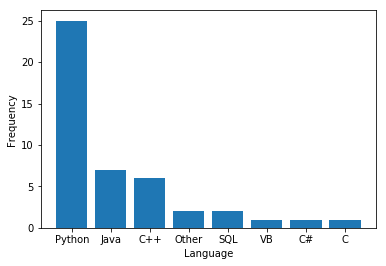

In [3]:
x_coords = range(len(languages_count_sorted))
labels = [x[0] for x in languages_count_sorted]
freqs = [x[1] for x in languages_count_sorted]
plt.bar(x_coords, freqs);
plt.xticks(x_coords, labels);
plt.xlabel('Language');
plt.ylabel('Frequency');
plt.show()

---
## Problem 4
In chemical kinetics, the reaction rate coefficient for a given reaction depends on the temperature of the system.  The functional relationship between the reaction rate coefficient and temperature is given by the Arrhenius rate:
\begin{align}
k\left(T\right) = A T^{b}\exp\left(-\frac{E}{RT}\right)
\end{align}
where $A$, $b$, and $E$ are parameters, $R = 8.314 \dfrac{\textrm{J}}{\textrm{mol} \textrm{ K}}$  is the universal gas constant, and $T$ is the temperature.

Write a function which returns $k\left(T\right)$ given $A$, $b$, $E$, and $T$.  Here are a few requirements:
* The function should test for exceptions where necessary.
* Pass the parameters $A$, $b$, and $E$ in as a list.
* Make $R$ a keyword argument to the function.

In [4]:
def Arrhenius_rate(T, parameters, **kwargs):
    
    # Check temperature
    # T can be either a numpy array or a number
    try:
        try:
            if all(T > 0):
                pass
            else:
                raise ValueError
        except:
            if T <= 0:
                raise ValueError
    except:
        print('Invalid temperature! Please check and set a valid temperature (in K)!')
        return None
    
    # Check parameters
    try:
        if 3 != len(parameters):
            raise ValueError
        parameters = [float(p) for p in parameters]
    except:
        print('Invalid parameters! Please pass the parameters A, b, E in as a list and make sure they are valid numbers!')
        return None
    
    # Check the universal gas constant R
    try:
        R = float(kwargs['R'])
        if R <= 0:
            raise ValueError
    except:
        print('Invalid or missing universal gas constant R! Please set a valid R (in J/mol/K)!')
        return None
    
    return parameters[0] * T**parameters[1] * np.exp(-parameters[2]/(R*T))
    

In [5]:
# Test 1 (invalid temperature)
Arrhenius_rate(-10, [100,4,1], R=8.314)
Arrhenius_rate([10], [100,4,1], R=8.314)
Arrhenius_rate('T', [100,4,1], R=8.314)

Invalid temperature! Please check and set a valid temperature (in K)!
Invalid temperature! Please check and set a valid temperature (in K)!
Invalid temperature! Please check and set a valid temperature (in K)!


In [6]:
# Test 2 (invalid parameters)
Arrhenius_rate(273, [100,4,1,10], R=8.314)
Arrhenius_rate(273, 100, R=8.314)

Invalid parameters! Please pass the parameters A, b, E in as a list and make sure they are valid numbers!
Invalid parameters! Please pass the parameters A, b, E in as a list and make sure they are valid numbers!


In [7]:
# Test 3 (invalid/missing R)
Arrhenius_rate(273, [100,4,1], R=-10)
Arrhenius_rate(273, [100,4,1])

Invalid or missing universal gas constant R! Please set a valid R (in J/mol/K)!
Invalid or missing universal gas constant R! Please set a valid R (in J/mol/K)!


In [8]:
# Test 4 (valid input)
Arrhenius_rate(273, [100,2,50000], R=8.314)

0.0020192769398056079

---
## Problem 5
Using `numpy` arrays, plot $k\left(T\right)$ for $T\in\left(0, 5000\right]$ for three different sets of parameters $\left\{A, b, E\right\}$.  Make sure all three lines are on the same figure and be sure to label each line.  You may use the function from Problem 2.  You may want to play with the parameters a little bit to get some nice curves but you won't lose points for ugly curves either (as long as they're correct!).

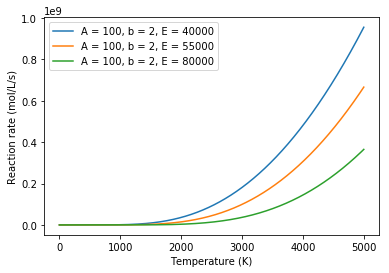

In [9]:
para1 = [100, 2, 40000]
para2 = [100, 2, 55000]
para3 = [100, 2, 80000]
T = np.arange(1, 5001)
k1 = Arrhenius_rate(T, para1, R=8.314)
k2 = Arrhenius_rate(T, para2, R=8.314)
k3 = Arrhenius_rate(T, para3, R=8.314)
plt.plot(T, k1, label='A = {}, b = {}, E = {}'.format(para1[0], para1[1], para1[2]));
plt.plot(T, k2, label='A = {}, b = {}, E = {}'.format(para2[0], para2[1], para2[2]));
plt.plot(T, k3, label='A = {}, b = {}, E = {}'.format(para3[0], para3[1], para3[2]));
plt.legend();
plt.xlabel('Temperature (K)');
plt.ylabel('Reaction rate (mol/L/s)');